In [2]:
import re
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("data4.csv",sep='|', index_col = 0 ) 

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,timestamp,amperage,voltage,pillar
0,2018-04-15 03:00:02,0.25,229.19,pillar_28
1,2018-04-15 03:00:03,0.12,258.26,pillar_17
2,2018-04-15 03:00:03,0.29,248.17,pillar_15
3,2018-04-15 03:00:03,0.27,240.52,pillar_18
4,2018-04-15 03:00:03,0.44,239.9,pillar_13
5,2018-04-15 03:00:03,0.32,250.61,pillar_16
6,2018-04-15 03:00:03,0.27,217.87,pillar_27
7,2018-04-15 03:00:03,0.39,244.49,pillar_19
8,2018-04-15 03:00:03,0.32,256.73,pillar_20
9,2018-04-15 03:00:03,0.22,254.29,pillar_36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454197 entries, 0 to 454196
Data columns (total 4 columns):
timestamp    454197 non-null object
amperage     454197 non-null object
voltage      325497 non-null object
pillar       454197 non-null object
dtypes: object(4)
memory usage: 17.3+ MB


# В voltage 128 701 Nan

In [6]:
df.isna().any()

timestamp    False
amperage     False
voltage       True
pillar       False
dtype: bool

# Для возможности работы со столбцами приводим их к конкрентным типам

In [7]:
df['pillar'] = df['pillar'].str.replace('pillar'+'_','')
df['pillar']=pd.to_numeric(df['pillar'], errors='coerce')
df['amperage']=pd.to_numeric(df['amperage'], errors='coerce')
df['voltage']=pd.to_numeric(df['voltage'], errors='coerce')
print(df.dtypes)

timestamp     object
amperage     float64
voltage      float64
pillar         int64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454197 entries, 0 to 454196
Data columns (total 4 columns):
timestamp    454197 non-null object
amperage     454196 non-null float64
voltage      325496 non-null float64
pillar       454197 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.3+ MB


In [9]:
import matplotlib.pyplot as plt 
plt.hist(df['voltage'],10)
plt.show()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 640x480 with 1 Axes>

# Одна строка имеет явно не корректное значение

In [10]:
df[df.voltage > 275]

,timestamp,amperage,voltage,pillar
30000,2018-04-15 17:42:17,0.15,10000.0,40


In [11]:
df.describe()

,amperage,voltage,pillar
count,454196.000000,325496.000000,454197.000000
mean,0.162519,239.541875,23.165318
std,0.137782,23.662881,10.367752
min,0.000000,0.000000,6.000000
25%,0.070000,227.660000,14.000000
50%,0.120000,241.130000,23.000000
75%,0.220000,252.450000,32.000000
max,1.230000,10000.000000,41.000000


# Заменяем его средним

In [12]:
df.loc[df['voltage'] > 275, 'voltage'] = df.voltage.mean()

In [13]:
df.describe()

,amperage,voltage,pillar
count,454196.000000,325496.000000,454197.000000
mean,0.162519,239.511889,23.165318
std,0.137782,16.347752,10.367752
min,0.000000,0.000000,6.000000
25%,0.070000,227.660000,14.000000
50%,0.120000,241.130000,23.000000
75%,0.220000,252.450000,32.000000
max,1.230000,274.480000,41.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454197 entries, 0 to 454196
Data columns (total 4 columns):
timestamp    454197 non-null object
amperage     454196 non-null float64
voltage      325496 non-null float64
pillar       454197 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.3+ MB


# В voltage 128 701 и в amperage 1 Nan, заменяем их средними значениями

In [15]:
df.isna().any()

timestamp    False
amperage      True
voltage       True
pillar       False
dtype: bool

In [16]:
columns = {'voltage': df.voltage.mean(),'amperage': df.amperage.mean()}
df = df.fillna(columns)

In [17]:
df.isna().any()

timestamp    False
amperage     False
voltage      False
pillar       False
dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454197 entries, 0 to 454196
Data columns (total 4 columns):
timestamp    454197 non-null object
amperage     454197 non-null float64
voltage      454197 non-null float64
pillar       454197 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.3+ MB


# Nan больше нет

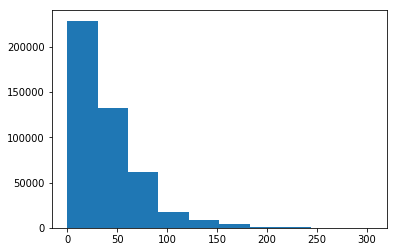

In [19]:
import matplotlib.pyplot as plt 
df['power']=df['amperage']*df['voltage']
plt.hist(df['power'],10)
plt.show()

# Выброшенных значений не наблюдается

In [20]:
df.describe()

,amperage,voltage,pillar,power
count,454197.000000,454197.000000,454197.000000,454197.000000
mean,0.162519,239.511889,23.165318,38.872505
std,0.137781,13.839123,10.367752,33.045358
min,0.000000,0.000000,6.000000,0.000000
25%,0.070000,231.640000,14.000000,16.471700
50%,0.120000,239.511889,23.000000,30.037200
75%,0.220000,246.940000,32.000000,52.692616
max,1.230000,274.480000,41.000000,304.867800


# Разбиение на 3 группы

In [21]:
df2=pd.pivot_table(df, values='power', index=['pillar']).sort_values(by=['power'])
df2

,power
pillar,
23,12.080403
21,13.039580
40,24.495384
41,25.456303
11,25.493268
9,25.566365
13,25.842781
34,25.897036
39,26.209408


In [22]:
df_low = df.query("pillar in [21,23]")
df_low

,timestamp,amperage,voltage,pillar,power
30,2018-04-15 03:00:46,0.10,239.511889,23,23.951189
32,2018-04-15 03:00:54,0.07,243.880000,21,17.071600
64,2018-04-15 03:01:46,0.07,235.010000,23,16.450700
66,2018-04-15 03:01:54,0.05,243.880000,21,12.194000
98,2018-04-15 03:02:46,0.00,239.511889,23,0.000000
101,2018-04-15 03:02:54,0.00,243.880000,21,0.000000
132,2018-04-15 03:03:46,0.00,235.930000,23,0.000000
134,2018-04-15 03:03:54,0.07,243.880000,21,17.071600
166,2018-04-15 03:04:46,0.00,236.230000,23,0.000000
168,2018-04-15 03:04:54,0.07,244.490000,21,17.114300


In [23]:
df_mean = df.query("pillar not in [21,23,25]")
df_mean

,timestamp,amperage,voltage,pillar,power
0,2018-04-15 03:00:02,0.25,229.190000,28,57.297500
1,2018-04-15 03:00:03,0.12,258.260000,17,30.991200
2,2018-04-15 03:00:03,0.29,248.170000,15,71.969300
3,2018-04-15 03:00:03,0.27,240.520000,18,64.940400
4,2018-04-15 03:00:03,0.44,239.900000,13,105.556000
5,2018-04-15 03:00:03,0.32,250.610000,16,80.195200
6,2018-04-15 03:00:03,0.27,217.870000,27,58.824900
7,2018-04-15 03:00:03,0.39,244.490000,19,95.351100
8,2018-04-15 03:00:03,0.32,256.730000,20,82.153600
9,2018-04-15 03:00:03,0.22,254.290000,36,55.943800


In [24]:
df_mean2=pd.pivot_table(df_mean, values='power', index=['pillar']).sort_values(by=['power'])
df_mean2

,power
pillar,
40,24.495384
41,25.456303
11,25.493268
9,25.566365
13,25.842781
34,25.897036
39,26.209408
10,26.634353
38,26.669122


In [25]:
df_high = df[df.pillar == 25]
df_high

,timestamp,amperage,voltage,pillar,power
27,2018-04-15 03:00:18,0.47,263.160000,25,123.685200
61,2018-04-15 03:01:18,0.59,239.511889,25,141.312014
95,2018-04-15 03:02:18,0.49,255.820000,25,125.351800
129,2018-04-15 03:03:18,0.59,263.770000,25,155.624300
163,2018-04-15 03:04:18,0.83,266.220000,25,220.962600
197,2018-04-15 03:05:18,0.51,259.180000,25,132.181800
231,2018-04-15 03:06:18,0.44,263.160000,25,115.790400
265,2018-04-15 03:07:18,0.54,264.380000,25,142.765200
299,2018-04-15 03:08:18,0.64,261.630000,25,167.443200
333,2018-04-15 03:09:18,0.42,239.511889,25,100.594993
